In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt

In [1]:
pip install PdfWriter

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PdfWriter
ERROR: No matching distribution found for PdfWriter


# Read dataset files

In [2]:
all_file_path=glob('Datavers_files/*.edf')
print((all_file_path))

['Datavers_files\\h01.edf', 'Datavers_files\\h02.edf', 'Datavers_files\\h03.edf', 'Datavers_files\\h04.edf', 'Datavers_files\\h05.edf', 'Datavers_files\\h06.edf', 'Datavers_files\\h07.edf', 'Datavers_files\\h08.edf', 'Datavers_files\\h09.edf', 'Datavers_files\\h10.edf', 'Datavers_files\\h11.edf', 'Datavers_files\\h12.edf', 'Datavers_files\\h13.edf', 'Datavers_files\\h14.edf', 'Datavers_files\\s01.edf', 'Datavers_files\\s02.edf', 'Datavers_files\\s03.edf', 'Datavers_files\\s04.edf', 'Datavers_files\\s05.edf', 'Datavers_files\\s06.edf', 'Datavers_files\\s07.edf', 'Datavers_files\\s08.edf', 'Datavers_files\\s09.edf', 'Datavers_files\\s10.edf', 'Datavers_files\\s11.edf', 'Datavers_files\\s12.edf', 'Datavers_files\\s13.edf', 'Datavers_files\\s14.edf']


Read Healthy people And Patirnt people

In [3]:
healthy_file = [i for i in all_file_path if 'h' in i.split('\\')[1]]
patient_file = [i for i in all_file_path if 's' in i.split('\\')[1]]
print(len(healthy_file),len(patient_file))

14 14


In [6]:
import mne

Read data file and pass frequency for all channels

In [7]:
def read_data(file_path):
    data=mne.io.read_raw_edf(file_path,preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5,h_freq=45)
    epochs = mne.make_fixed_length_epochs(data,duration=5,overlap=1)
    array = epochs.get_data()
    return array

Read Healthy file 1

In [8]:
sample_data = read_data(healthy_file[0])

Extracting EDF parameters from C:\Users\Anuj\Untitled Folder\EEG classification\Datavers_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


Not setting metadata
231 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped


In [9]:
sample_data.shape   #no of epoches, #no of segments, #no of signal

(231, 19, 1250)

Creating Epochs for healthy people and Affected people

In [10]:
%%capture
control_epochs_array=[read_data(i) for i in healthy_file] 
patient_epochs_array=[read_data(i) for i in patient_file]

In [11]:
control_epochs_array[0].shape,control_epochs_array[1].shape

((231, 19, 1250), (227, 19, 1250))

Lables for healthy people 0 and patient 1

In [12]:
control_epochs_lables=[len(i)*[0] for i in control_epochs_array]
patient_epochs_lables=[len(i)*[1] for i in patient_epochs_array]
len(control_epochs_lables),len(patient_epochs_lables)

(14, 14)

Creating data_list and Lable_list for Healthy and Patient

In [15]:
data_list = control_epochs_array+patient_epochs_array
lable_list=control_epochs_lables+patient_epochs_lables

In [16]:
group_list = [[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

28

In [17]:
data_array = np.vstack(data_list)
lable_array = np.hstack(lable_list)
group_array = np.hstack(group_list)
print(data_array.shape,lable_array.shape,group_array.shape)

(7201, 19, 1250) (7201,) (7201,)


Find Mean, Standard Deviation, Entropy, Skewness and Kurtosis

In [18]:
import pyedflib
from scipy.stats import entropy, skew, kurtosis

In [19]:
print("Mean of the given healthy and affected patient: ",np.mean(lable_array))
print("Standard deviation :",np.std(lable_array))
print("Entropy is: ",entropy(lable_array))
print("Skewness: ",skew(lable_array))
print("Kurtosis: ",kurtosis(lable_array))

Mean of the given healthy and affected patient:  0.5485349257047633
Standard deviation : 0.4976387856536437
Entropy is:  8.281470857895169
Skewness:  -0.1950608638392726
Kurtosis:  -1.961951259398277


In [20]:
print("Mean of the given healthy and affected patient: ",np.mean(group_array))
print("Standard deviation :",np.std(group_array))
print("Entropy is: ",entropy(group_array))
print("Skewness: ",skew(group_array))
print("Kurtosis: ",kurtosis(group_array))

Mean of the given healthy and affected patient:  14.533259269545896
Standard deviation : 8.355108854276068
Entropy is:  8.683030796251773
Skewness:  -0.10942011337858952
Kurtosis:  -1.2342413503883634


In [21]:
np.mean(data_array,axis = -1).shape

(7201, 19)

In [22]:
from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)

def std(x):
    return np.std(x,axis=-1)

def ptp(x):
    return np.ptp(x,axis=-1)

def var(x):
    return np.var(x,axis=-1)

def minim(x):
    return np.min(x,axis=-1)

def maxim(x):
    return np.max(x,axis=-1)

def argminim(x):
    return np.argmin(x,axis=-1)

def argmaxim(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)

def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concatenate_features(x):
    return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),argmaxim(x),rms(x),abs_diff_signal(x),skewness(x),kurtosis(x)),axis=-1)

In [23]:
features=[]
for d in data_array:
    features.append(concatenate_features(d))

Creating Features_array by combining data_array with group_arary

In [24]:
features_array = np.array(features)
features_array.shape

(7201, 228)

In [25]:
228/19 #we used 11 features for the purpose of classification 

12.0

# Logistic regresssion

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #pipe gives the standard scaler and then classifire to the data
from sklearn.model_selection import GroupKFold,GridSearchCV #it used for higher power twning

In [27]:
clf = LogisticRegression()
gkf=GroupKFold(10)
pipe=Pipeline([('Scaler',StandardScaler()),('clf',clf)])
param_grid={'clf__C':[0.1,0.5,0.7,1,3,7]}
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=19)
gscv.fit(features_array,lable_array,groups=group_array)

C:\Users\Anuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=GroupKFold(n_splits=10),
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=19, param_grid={'clf__C': [0.1, 0.5, 0.7, 1, 3, 7]})

In [28]:
Logist_Accuracy=gscv.best_score_

In [29]:
print(Logist_Accuracy)

0.666906097648454


# Decision Tree (Features_array and lable_array)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features_array, lable_array, test_size=0.2, random_state=42)

In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
Decision_accuracy = clf.score(X_test, y_test)
print("Accuracy:", Decision_accuracy)

Accuracy: 0.8688410825815406


In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[563  99]
 [ 90 689]]


In [35]:
def calculate_sensitivity_specificity(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

In [36]:
decision_tree_sensitivity, decision_tree_specificity = calculate_sensitivity_specificity(conf_matrix)
print("Sensitivity:", decision_tree_sensitivity)
print("Specificity:", decision_tree_specificity)

Sensitivity: 0.8844672657252889
Specificity: 0.850453172205438


In [37]:
from sklearn import tree

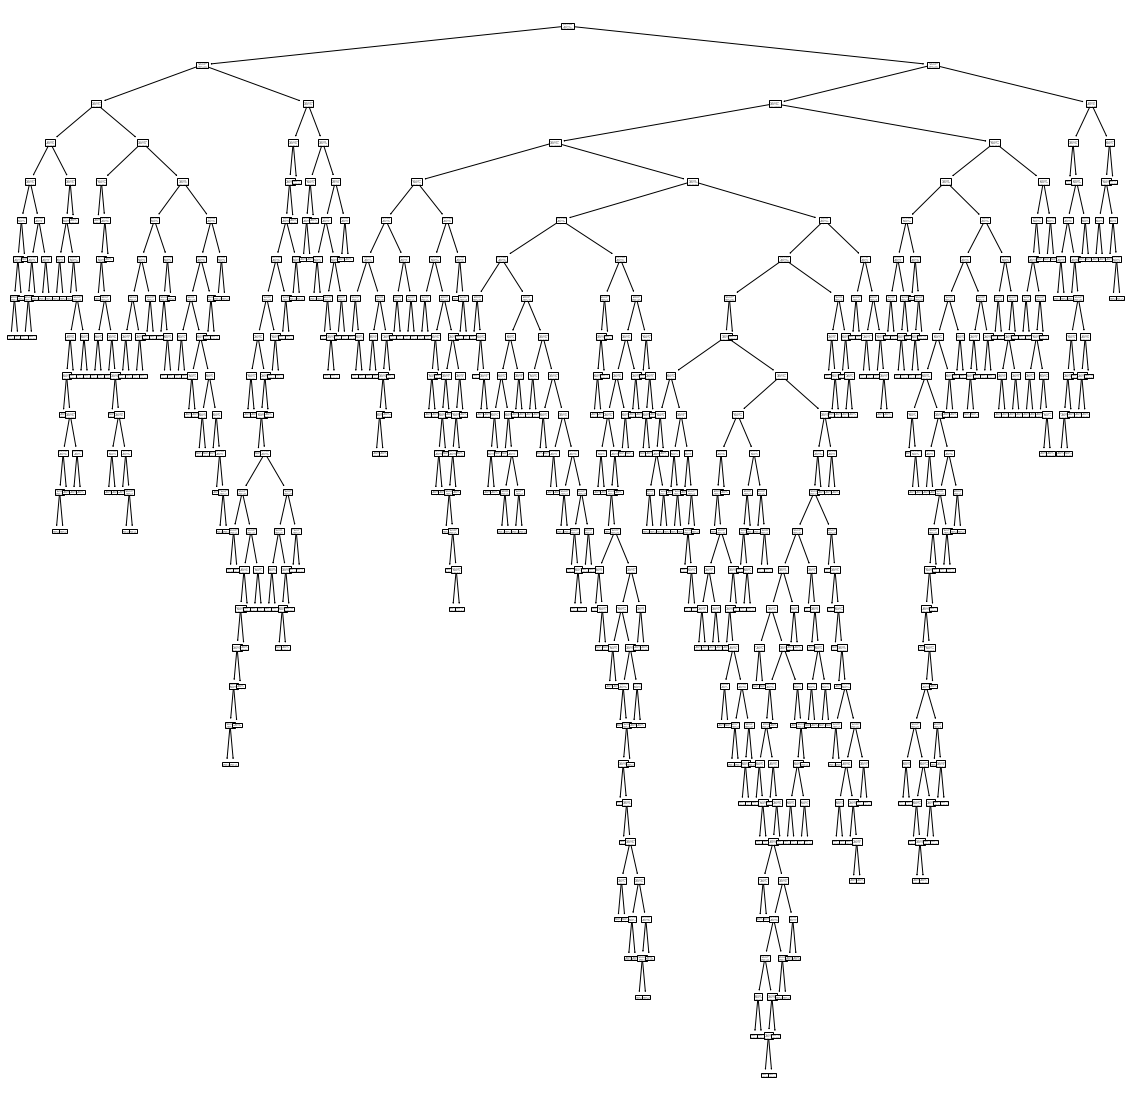

In [38]:
clf1 = DecisionTreeClassifier()

# Train the classifier on the training data
clf1.fit(features_array, lable_array)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf1, ax=ax)
plt.show()

Mean, standard_deviation, entropy, skewness and Kurtosis

In [39]:
from scipy.stats import entropy, skew, kurtosis
mean = np.mean(features_array)
std = np.std(features_array)

# Calculate the entropy of the label array
label_entropy = entropy(lable_array)

# Calculate the skewness and kurtosis of the group array
group_skewness = skew(group_array)
group_kurtosis = kurtosis(group_array)

# Result
print("Mean:", mean)
print("Standard deviation:", std)
print("Label entropy:", label_entropy)
print("Group skewness:", group_skewness)
print("Group kurtosis:", group_kurtosis)

Mean: 103.34876700588158
Standard deviation: 275.6360128598445
Label entropy: 8.281470857895169
Group skewness: -0.10942011337858952
Group kurtosis: -1.2342413503883634


Algorithm Comparision

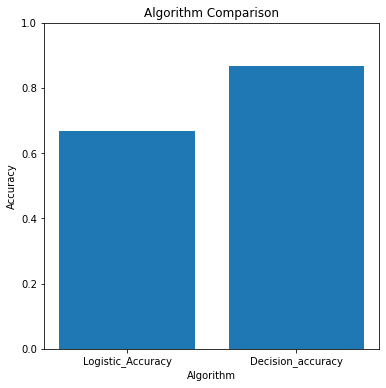

In [40]:
plt.figure(figsize=(6, 6))
plt.bar(['Logistic_Accuracy', 'Decision_accuracy'], [Logist_Accuracy, Decision_accuracy])
plt.ylim(0, 1)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

# Support Vector Machine

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features_array, lable_array, test_size=0.2, random_state=42)

In [43]:
svm = SVC(kernel= 'poly')

In [44]:
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [45]:
y_pred = svm.predict(X_test)

In [47]:
SVM_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [48]:
print('Accuracy: ',SVM_accuracy)

Accuracy:  0.5551700208188758


In [49]:
svm_matrix = conf_matrix

In [50]:
print("Confusion matrix:\n", svm_matrix)

Confusion matrix:
 [[ 85 577]
 [ 64 715]]


In [53]:
def calculate_sensitivity_specificity(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

In [54]:
svm_sensitivity, svm_specificity = calculate_sensitivity_specificity(svm_matrix)

In [55]:
print("SVM Results:")
print("Sensitivity:", svm_sensitivity)
print("Specificity:", svm_specificity)

SVM Results:
Sensitivity: 0.9178433889602053
Specificity: 0.1283987915407855


In [45]:
import seaborn as sns

# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
X_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test = (X_test - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))

In [44]:
# train a KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# predict the labels of the testing data
y_pred = knn.predict(X_test)

In [46]:
# compute the accuracy score and confusion matrix
Knn_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [47]:
print("Accuracy:", Knn_accuracy)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.4607911172796669
Confusion matrix:
 [[645  17]
 [760  19]]


# Comparing Accuracy

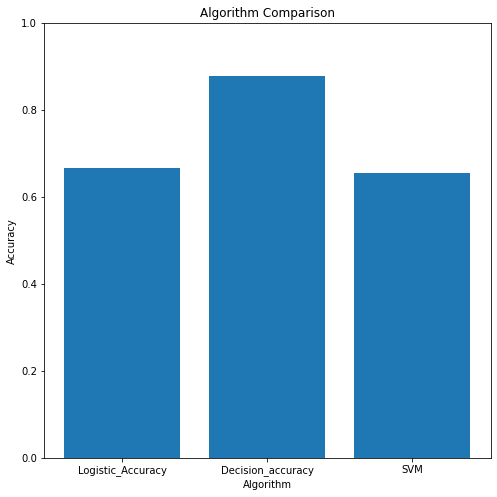

In [119]:
plt.figure(figsize=(8, 8))
plt.bar(['Logistic_Accuracy', 'Decision_accuracy','SVM'], [Logist_Accuracy, Decision_accuracy, Accuracy])
plt.ylim(0, 1)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

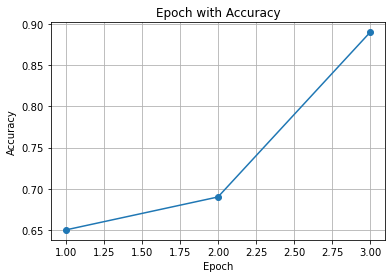

In [122]:
epochs = [1, 2, 3]
accuracy = [0.65, 0.69, 0.89]

# Plotting the epoch with accuracy graph
plt.plot(epochs, accuracy, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch with Accuracy')
plt.grid(True)
plt.show()

Signal Visualisation

In [ ]:
plt.style.use('seaborn-bright') # Plot Style
plt.rcParams['figure.dpi'] = 200 # DPI setting
plt.rcParams['figure.figsize'] = (4, 2)

Read first Healthy and patient file

In [23]:
raw_h = mne.io.read_raw_edf("h01.edf", preload=True)

Extracting EDF parameters from C:\Users\Anuj\Untitled Folder\EEG classification\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


In [24]:
raw_s = mne.io.read_raw_edf("s01.edf", preload=True)# Import data file into workspace
# s01 specifies the EEG record of SZ patient-1

Extracting EDF parameters from C:\Users\Anuj\Untitled Folder\EEG classification\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...


In [25]:
print('sample rate:', raw_h.info['sfreq'], 'Hz')
# Give the size of the data matrix

sample rate: 250.0 Hz


In [26]:
print('Data matrix size : %s channels x %s samples' % (raw_h.info['nchan'], len(raw_h.times)))

Data matrix size : 19 channels x 231250 samples


In [27]:
print('Channel names:', raw_h.info['ch_names'])

Channel names: ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']


Using matplotlib as 2D backend.


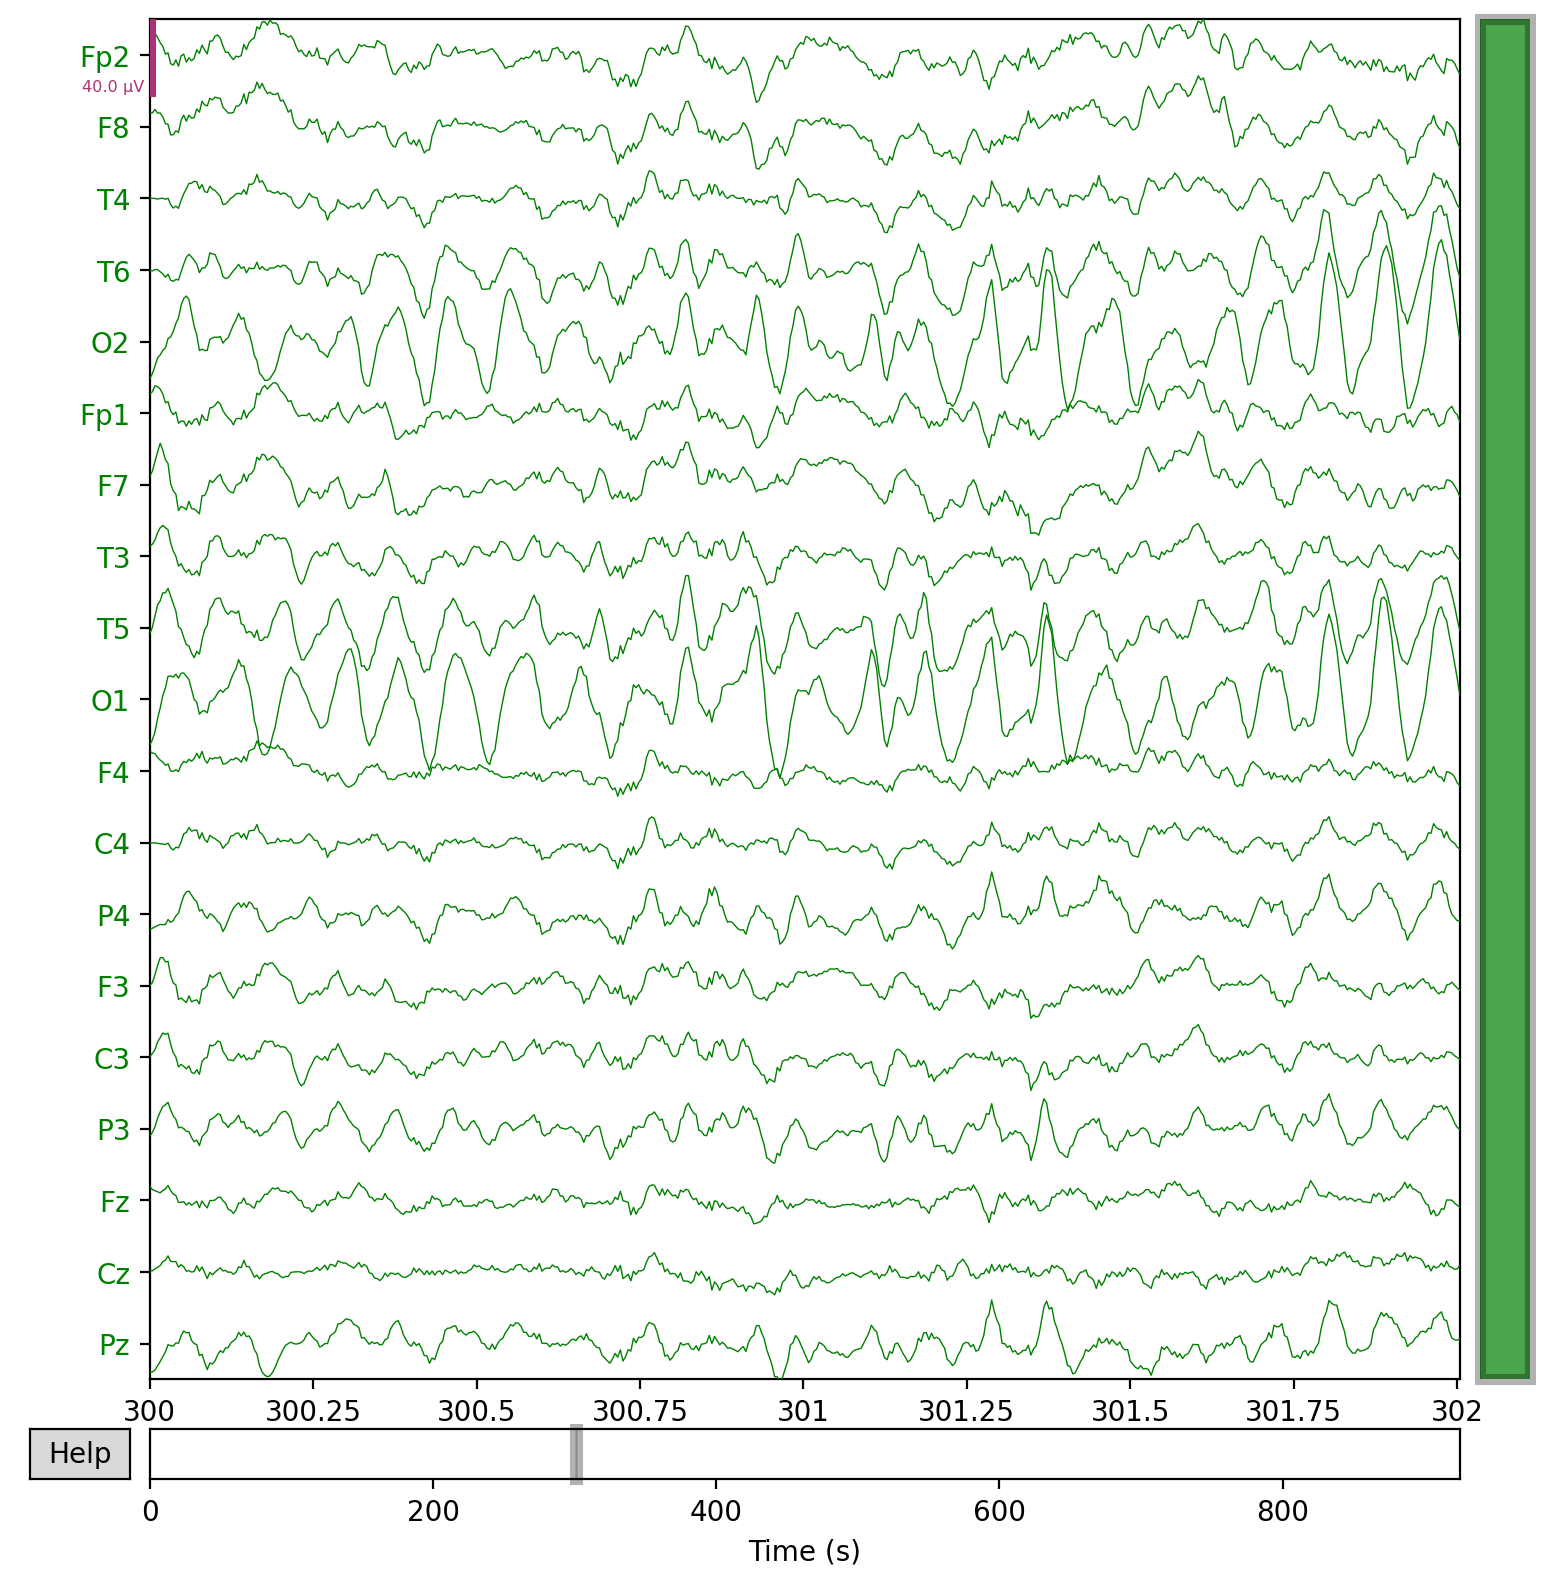

In [28]:
# Plotting the raw EEG signal
raw_h.plot(start=300,duration=2, block=True, show=False, color='green')

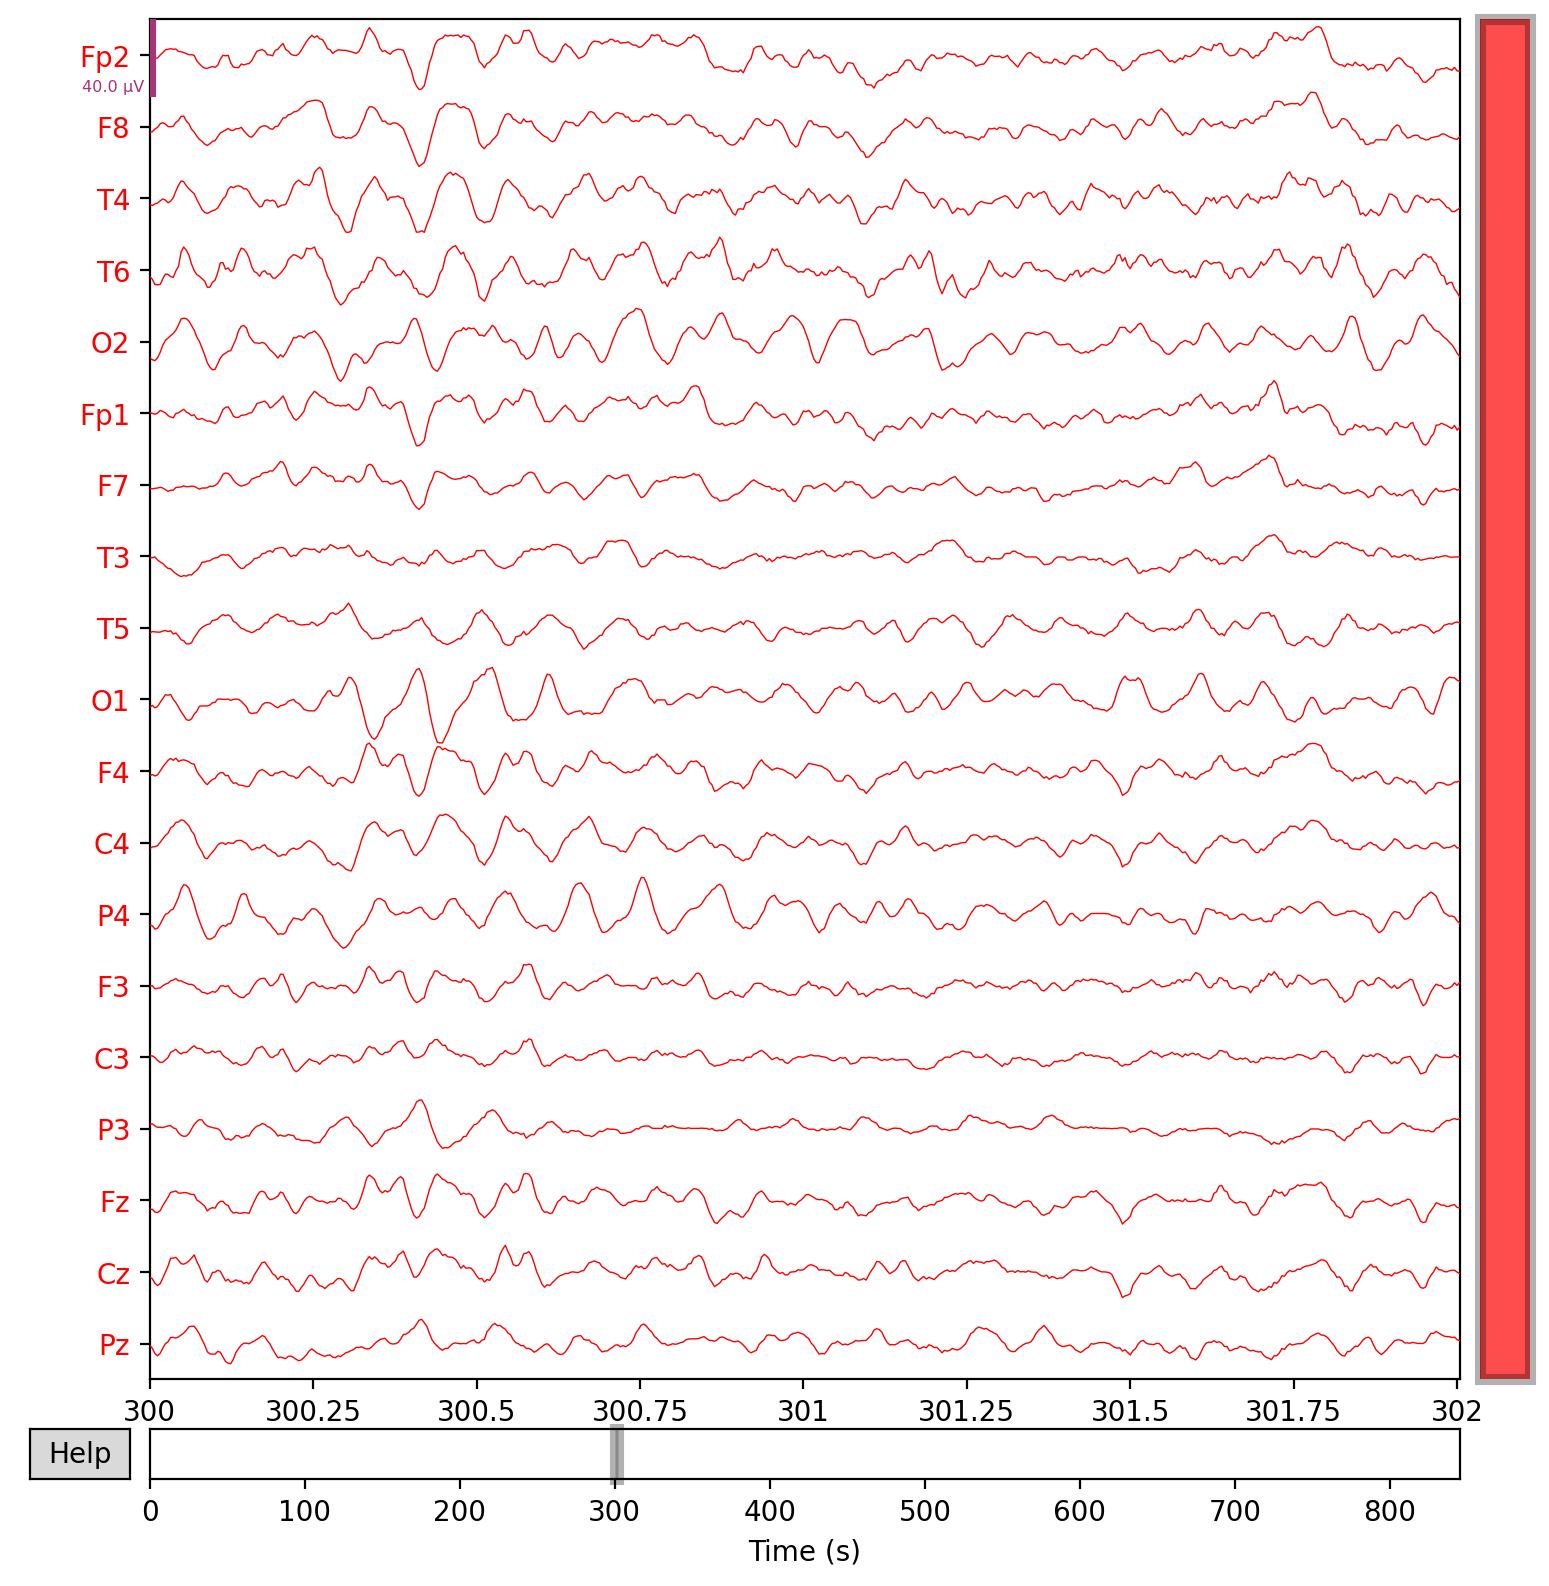

In [29]:
# Plotting the raw EEG signal
raw_s.plot(start=300,duration=2, block=True, show=False, color='red')

# Bandpass Filter in signals

In [30]:
xfil_h=raw_h.filter(0.5, 100., fir_design='firwin')#Bandpass filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


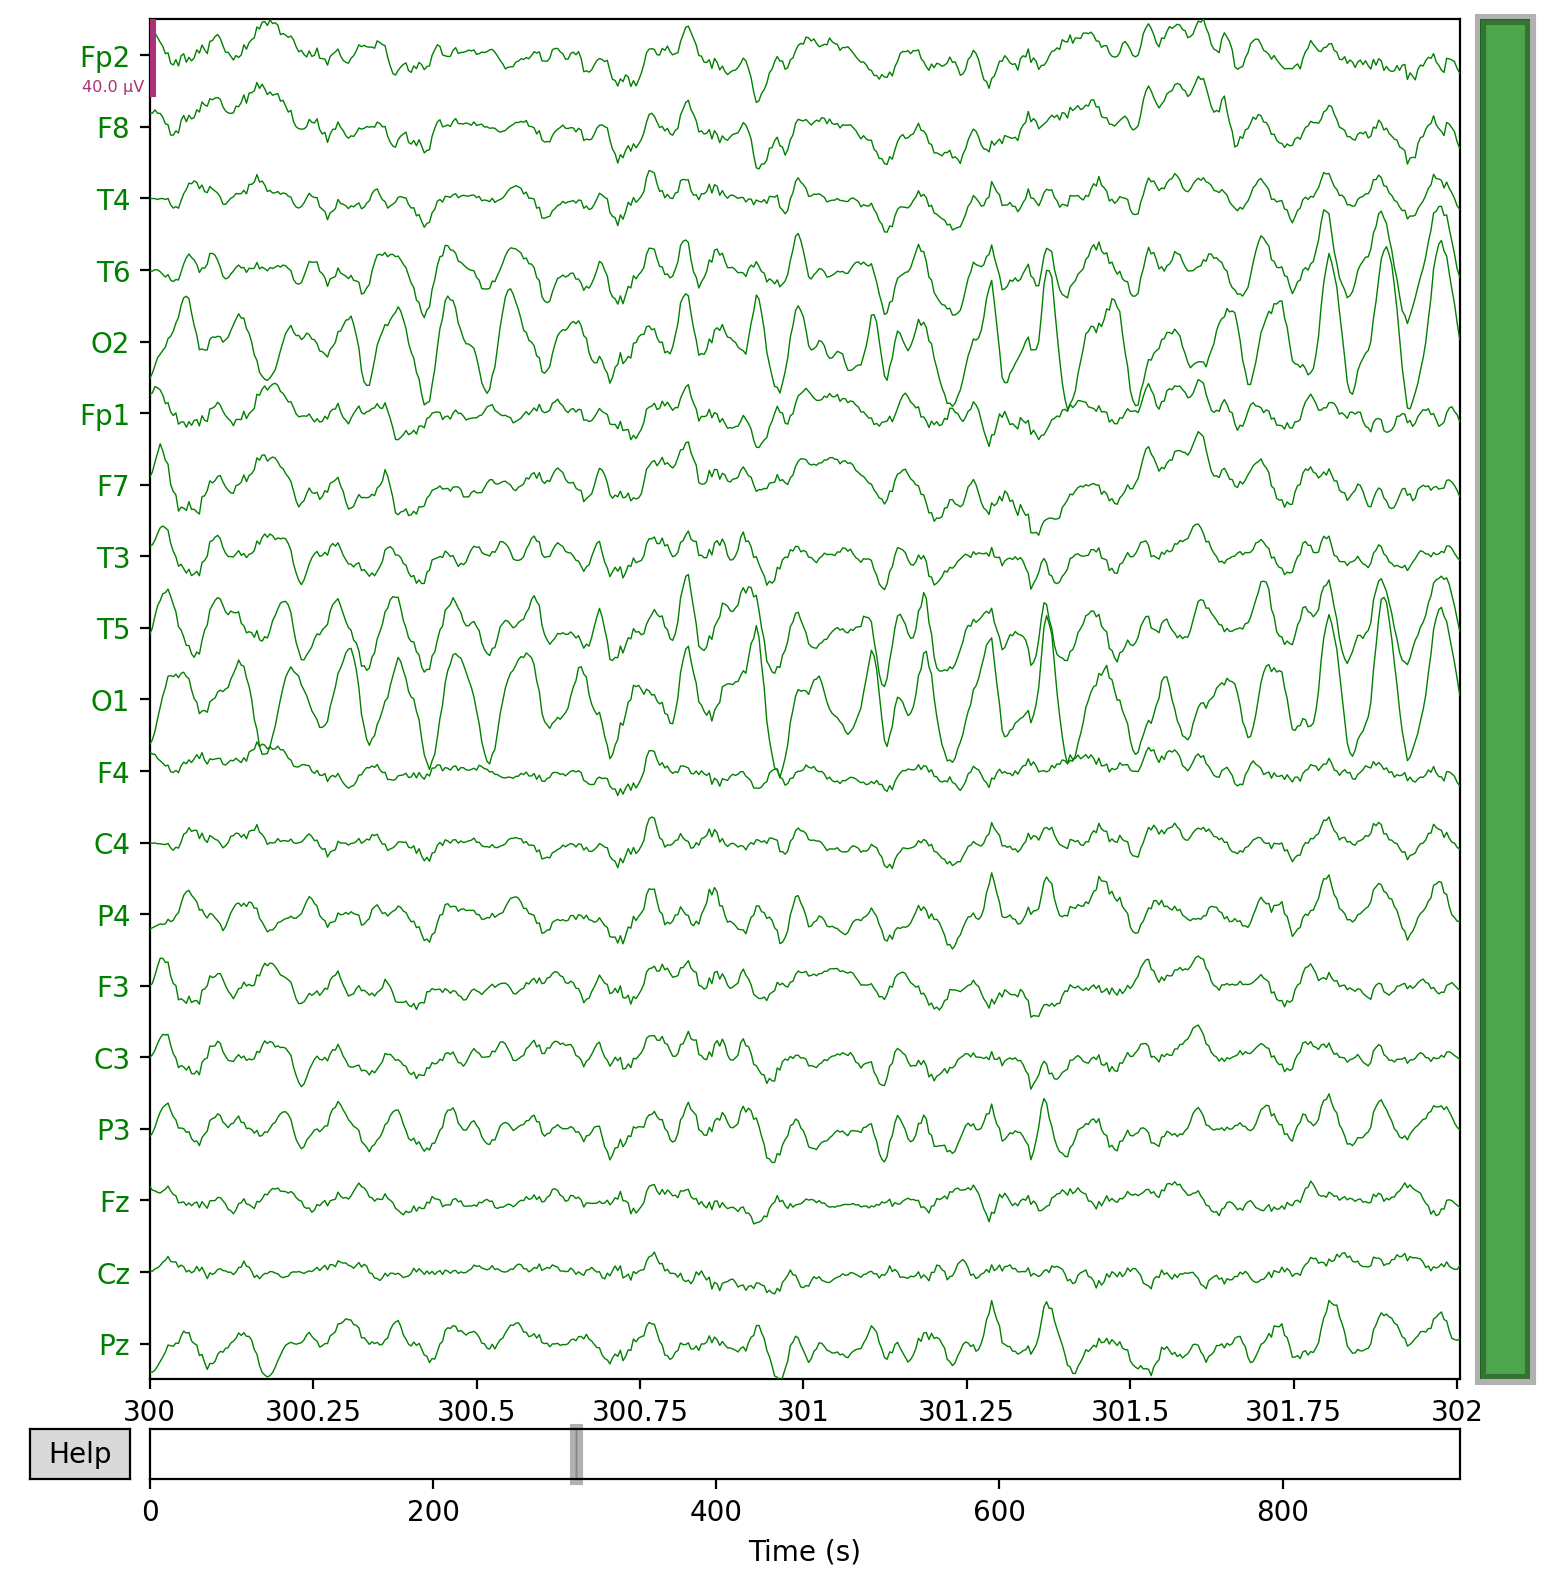

In [31]:
xfil_h.plot(start=300, duration=2, bgcolor='w',show=False, events=None,proj=False,color='green')#plotting of the filtered signal

In [32]:
xfil_s=raw_s.filter(0.5, 100., fir_design='firwin')#Bandpass filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


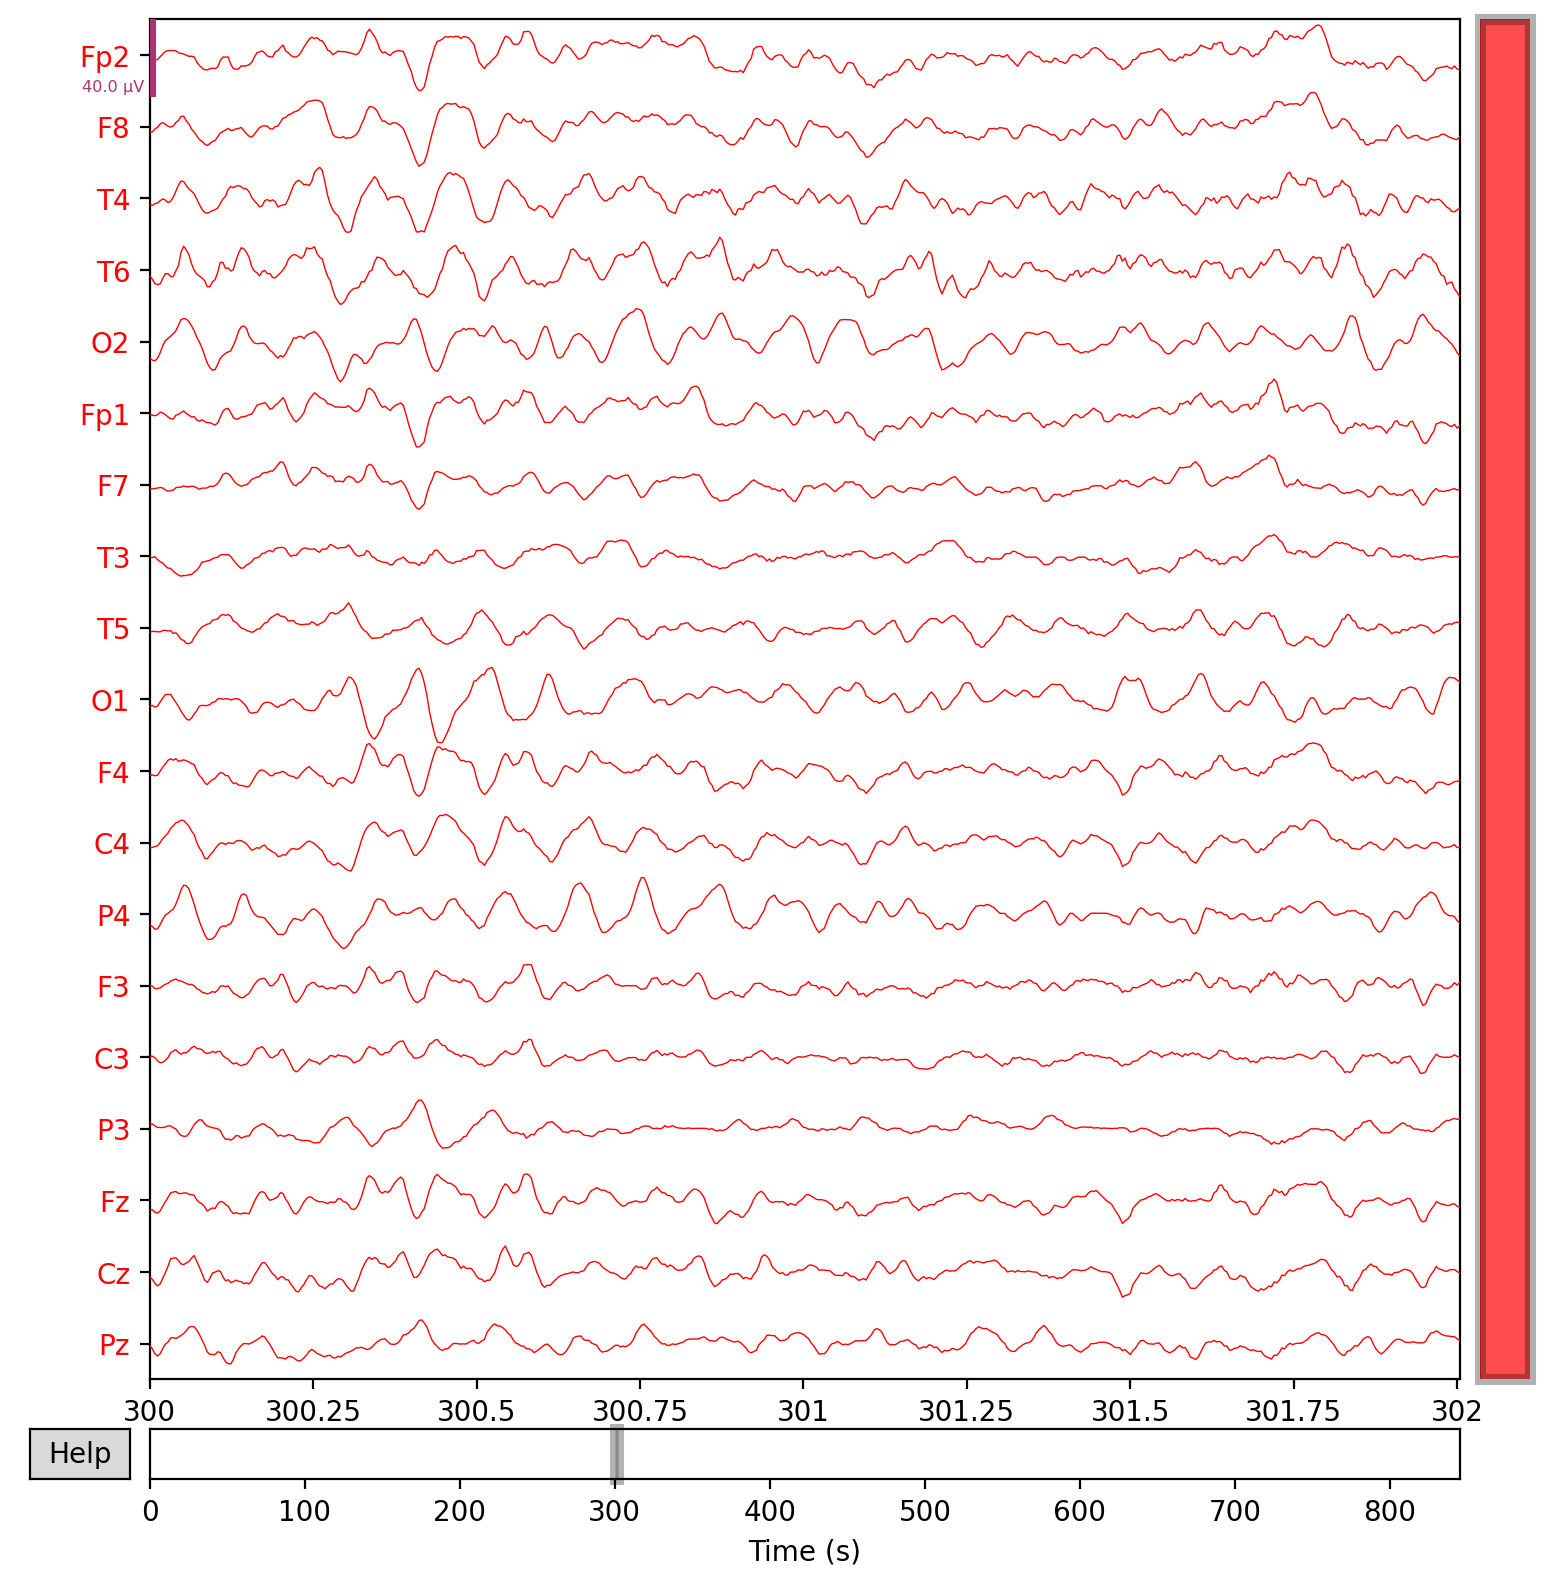

In [33]:
xfil_s.plot(start=300, duration=2, bgcolor='w',show=False, events=None,proj=False,color='red')#plotting of the filtered signal

# Plot Psd diagram for both the data who classify the affected points

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


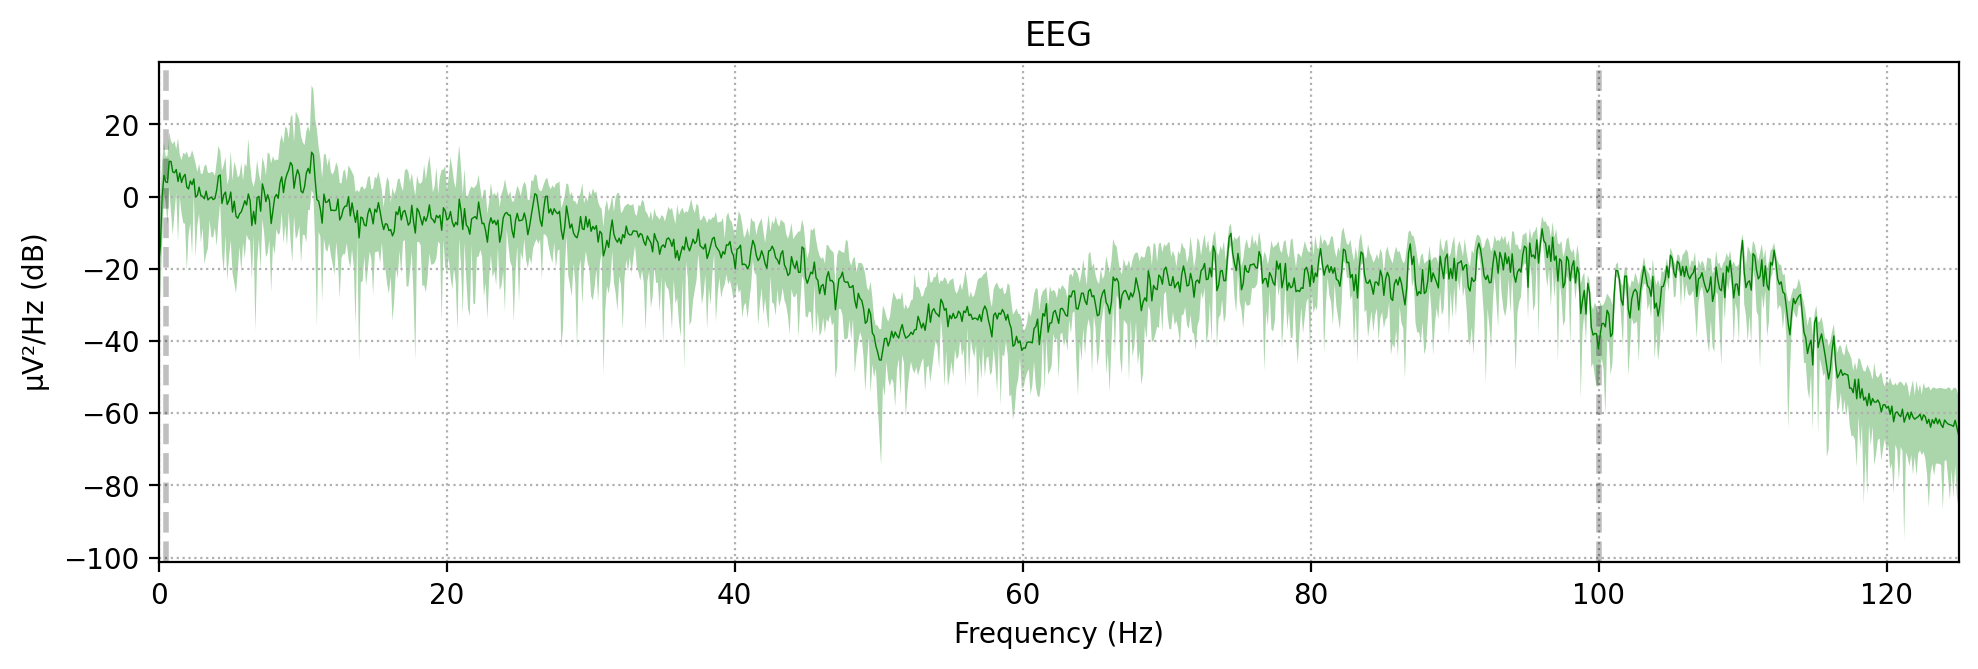

In [34]:
xfil_h.plot_psd(area_mode='range', tmax=10.0, show=False, average=True, color='green')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


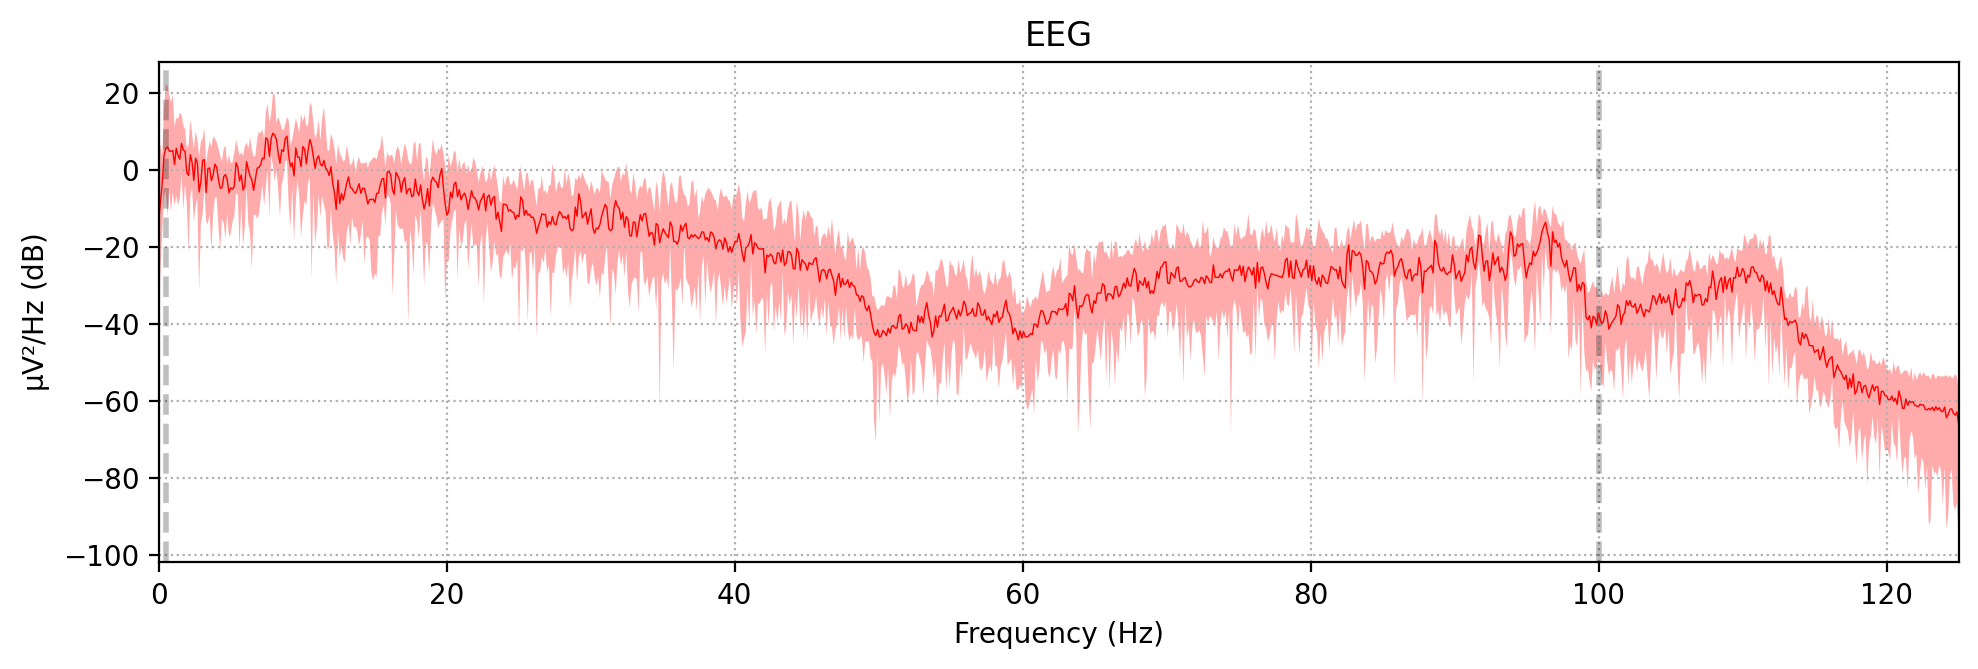

In [35]:
xfil_s.plot_psd(area_mode='range', tmax=10.0, show=False, average=True, color='red')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
h01_data = raw_h.get_data().T
s01_data = raw_s.get_data().T
data = np.vstack((h01_data, s01_data))
labels = np.hstack((np.zeros(h01_data.shape[0]), np.ones(s01_data.shape[0])))

In [38]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.8, random_state=42)

In [40]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the accuracy of the classifier on the testing set
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy of the Average logistic regression classifier on the testing set is {accuracy}')

The accuracy of the Average logistic regression classifier on the testing set is 0.5222401129943502


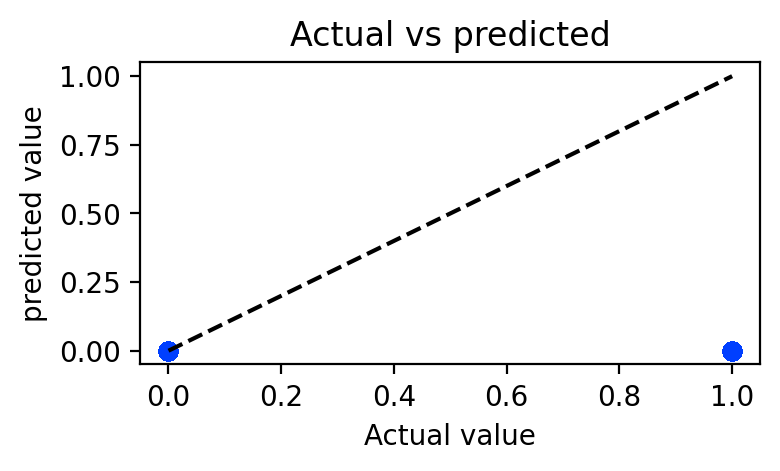

In [42]:
import seaborn as sns
plt.scatter(y_test,y_pred)
xmin,xmax = np.min([y_test,y_pred]), np.max([y_test,y_pred])
plt.plot([xmin,xmax], [xmin,xmax], 'k--')
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.title('Actual vs predicted')
plt.show()

In [43]:
import pyedflib
from scipy.stats import entropy, skew, kurtosis

In [63]:
print("Mean of the given healthy and affected patient: ",np.mean(labels))
print("Standard deviation :",np.std(labels))
print("Entropy is: ",entropy(labels))
print("Skewness: ",skew(labels))
print("Kurtosis: ",kurtosis(labels))

Mean of the given healthy and affected patient:  0.4774011299435028
Standard deviation : 0.4994890299818098
Entropy is:  12.260797545219427
Skewness:  0.09048795348846923
Kurtosis:  -1.9918119302734667
